## Preprocessing

In [1]:
# TODO: comment
import pandas as pd
import numpy as np
#
import warnings
warnings.filterwarnings("ignore")
#

In [2]:
# TODO: comment
path_to_file = "../data/Component_Faults_Data.csv"
df = pd.read_csv(path_to_file)

In [3]:
# TODO: comment
x = df.iloc[:, :48].values
y = df["class"].values.reshape(-1, 1)

In [4]:
# TODO: comment
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [5]:
# TODO: comment
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [6]:
# TODO: comment
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

## Data Exploration

In [7]:
# TODO: stats

In [8]:
# TODO: plot

## Newer Solution for testing NN-Configuration

In [38]:
# Imports for class
import sys
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt    
import itertools
        

""" 
    The following class helps in streamlining the building, training, and testing of a Neural Network (NN)
    With it, we can see the effect on the result for changing a single parameter 
    So we only have to provide the name of the parameter we have to change, and the values we want to test it with
"""
class NeuralNetworkParameterTester:

    # The config holds all the changeable parameters for building, training and testing the NN
    parameter_config = {
                'number_of_hidden_layers': [1],
                'number_of_units_per_hidden_layer': [10],
                'epochs': [100],
                'batch_size': [64],
                'activation_function': ['relu'],
                'loss_function': ['categorical_crossentropy'],
                'optimizer': ['sgd']}
    
    # Result of the test
    result = []
    
    """ 
        If you want to test your parameters, then you have to call this class
    """       
    def run(self):
        
        # Reset result
        self.result = []
        
        # Build all possible parameter combinations and  ...
        for config in self.__get_all_config_combinations():
            # ... build the NN-model for it
            model = self.__build(config)
            # ... train the NN-model 
            trained_model, history = self.__train(config, model)
            # ... test the NN-model and get the accuracy score
            accuracy = self.__test(trained_model)

            # Save the result
            self.result.append({'parameter_config': config.copy(), 
                                "result": {'model': trained_model, 
                                           'accuracy': accuracy}})
            
    """ 
        The following method builds all combinations of your parameter-config
    """          
    def __get_all_config_combinations(self):

        raw_combinations = list(itertools.product(*(self.parameter_config[parameter] for parameter in self.parameter_config)))

        config_combinations_list = []
        for combination in raw_combinations:
            c = {
                'number_of_hidden_layers': combination[0],
                'number_of_units_per_hidden_layer': combination[1],
                'epochs': combination[2],
                'batch_size': combination[3],
                'activation_function': combination[4],
                'loss_function': combination[5],
                'optimizer': combination[6]}
            
            config_combinations_list.append(c)
        
        return config_combinations_list
    
    """ 
        The following method builds the NN-Model
    """   
    def __build(self, config):

        # Sequential model (Basic NN)
        model = Sequential()        
        # Building of input layer
        model.add(Dense(config['number_of_units_per_hidden_layer'], 
                        input_dim=48, 
                        activation=config['activation_function']))
        # Building of hidden layer(s)
        for i in range(config['number_of_hidden_layers']):
            model.add(Dense(config['number_of_units_per_hidden_layer'], 
                            activation=config['activation_function']))
        # Building of output layer
        model.add(Dense(11, activation="softmax"))
        # ?
        model.compile(loss=config['loss_function'], 
                      optimizer=config['optimizer'], 
                      metrics=['accuracy'])
        return model
    
    """ 
        The following method trains the NN-Model
    """   
    def __train(self, config, model):
        # xtrain and ytrain is the data from preprocessing
        history = model.fit(x_train, 
                            y_train, 
                            epochs=config['epochs'], 
                            batch_size=config['batch_size'])  
        
        return model, history
    
    """ 
        The following method tests the NN-Model
    """ 
    # TODO: look at this method more closely. So far just copy paste
    @staticmethod
    def __test(model):
        y_pred = model.predict(x_test)
        # Converting predictions to label
        pred = list()
        for i in range(len(y_pred)):
            pred.append(np.argmax(y_pred[i]))
        # Converting one hot encoded test label to label
        test = list()
        for i in range(len(y_test)):
            test.append(np.argmax(y_test[i]))

        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(pred, test)
        # TODO: calculate confusion matrix and put it in result
        return accuracy
                                    
                                    
    #--------------- Setter methods for setting parameters --------------------------------------#
    
    def set_number_of_hidden_layers(self, val):
        if isinstance(val, list):
            self.parameter_config["number_of_hidden_layers"] = val
        else:
            self.parameter_config["number_of_hidden_layers"] = [val]
        
    def set_number_of_units_per_hidden_layer(self, val):
        if isinstance(val, list):
            self.parameter_config["number_of_units_per_hidden_layer"] = val
        else:
            self.parameter_config["number_of_units_per_hidden_layer"] = [val]
        
    def set_activation_function(self, val):
        if isinstance(val, list):
            self.parameter_config["activation_function"] = val
        else:
            self.parameter_config["activation_function"] = [val]
        
    def set_epochs(self, val):
        if isinstance(val, list):
            self.parameter_config["epochs"] = val
        else:
            self.parameter_config["epochs"] = [val]
        
    def set_batch_size(self, val):
        if isinstance(val, list):
            self.parameter_config["batch_size"] = val
        else:
            self.parameter_config["batch_size"] = [val]
        
    def set_loss_function(self, val):
        if isinstance(val, list):
            self.parameter_config["loss_function"] = val
        else:
            self.parameter_config["loss_function"] = [val]
        
    def set_optimizer(self, val):
        if isinstance(val, list):
            self.parameter_config["optimizer"] = val
        else:
            self.parameter_config["optimizer"] = [val]
        
    #--------------- Resets the config to default values --------------------------------------#
    
    def reset_config(self):
        parameter_config = {
            'number_of_hidden_layers': [1],
            'number_of_units_per_hidden_layer': [10],
            'epochs': [100],
            'batch_size': [64],
            'activation_function': ['relu'],
            'loss_function': ['categorical_crossentropy'],
            'optimizer': ['sgd']}
        
        self.parameter_config = parameter_config
        
        
    #--------------- Helper methods -----------------------------------------------------------#
        
    def __get_number_of_params_with_multiple_vals(self):
        number_of_params_with_multiple_vals = 0 
        for key in self.parameter_config.keys():
            if len(self.parameter_config[key]) > 1:
                number_of_params_with_multiple_vals += 1
        return number_of_params_with_multiple_vals
    
    def __get_param_names_with_multiple_vals(self):
        param_names_with_multiple_vals = [] 
        for key in self.parameter_config.keys():
            if len(self.parameter_config[key]) > 1:
                param_names_with_multiple_vals.append(key)
        return param_names_with_multiple_vals
        
        
    #--------------- Plotter methods -----------------------------------------------------------#
    
    def plot_result(self):
        
        number_of_params_with_multiple_vals = self.__get_number_of_params_with_multiple_vals()
        param_names_with_multiple_vals = self.__get_param_names_with_multiple_vals()
        
        if number_of_params_with_multiple_vals == 1:
            self.__plot_2d(param_names_with_multiple_vals[0])
        elif number_of_params_with_multiple_vals == 2:
            self.__plot_3d(param_names_with_multiple_vals)
        else:
            print("Plotting for this result is not supported")
            # TODO PCA?
        
    def __plot_2d(self, param_name_with_multiple_vals):

        param_vals = [element['parameter_config'][param_name_with_multiple_vals] for element in self.result]
        accuracy_result = [element['result']['accuracy'] for element in self.result]

        plt.scatter(param_vals, accuracy_result)
        plt.plot(param_vals, accuracy_result, linestyle='--')
        plt.title("Accuracy per " + "'" + param_name_with_multiple_vals + "'")
        plt.ylabel("Accuracy")
        plt.xlabel(param_name_with_multiple_vals)
        plt.show()
        
        print("/n/n")
        
        df = pd.DataFrame(list(zip(param_vals, accuracy_result)), 
               columns =[param_name_with_multiple_vals, 'Accuracy']) 
        print(df)
        
        
    # TODO sis  
    def __plot_3d(self, param_name_with_multiple_vals):

        pass

## Test NN with parameters

In [39]:
nnpt = NeuralNetworkParameterTester()

In [40]:
nnpt.set_number_of_hidden_layers(2)
nnpt.set_number_of_units_per_hidden_layer([2, 5, 6])

In [41]:
nnpt.parameter_config

{'number_of_hidden_layers': [2],
 'number_of_units_per_hidden_layer': [2, 5, 6],
 'epochs': [100],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd']}

In [42]:
nnpt.run()

Epoch 1/100
26329/26329 [==============================] - 1s 30us/step - loss: 2.3971 - acc: 0.0882
Epoch 2/100
26329/26329 [==============================] - 0s 15us/step - loss: 2.3884 - acc: 0.0939
Epoch 3/100
26329/26329 [==============================] - 0s 15us/step - loss: 2.3798 - acc: 0.1010
Epoch 4/100
26329/26329 [==============================] - 0s 14us/step - loss: 2.3668 - acc: 0.1150
Epoch 5/100
26329/26329 [==============================] - 0s 15us/step - loss: 2.3458 - acc: 0.1270
Epoch 6/100
26329/26329 [==============================] - 0s 14us/step - loss: 2.3128 - acc: 0.1423
Epoch 7/100
26329/26329 [==============================] - 0s 15us/step - loss: 2.2318 - acc: 0.1693
Epoch 8/100
26329/26329 [==============================] - 0s 15us/step - loss: 2.0132 - acc: 0.1815
Epoch 9/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.8862 - acc: 0.2056
Epoch 10/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.8138 - a

26329/26329 [==============================] - 0s 14us/step - loss: 1.2527 - acc: 0.4233
Epoch 82/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2501 - acc: 0.4257
Epoch 83/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2485 - acc: 0.4257
Epoch 84/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2458 - acc: 0.4242
Epoch 85/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2440 - acc: 0.4247
Epoch 86/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2411 - acc: 0.4242
Epoch 87/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2395 - acc: 0.4276
Epoch 88/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2389 - acc: 0.4265
Epoch 89/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2361 - acc: 0.4271
Epoch 90/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2356 - acc: 

26329/26329 [==============================] - 0s 14us/step - loss: 0.4128 - acc: 0.8441
Epoch 62/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.4044 - acc: 0.8479
Epoch 63/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.3961 - acc: 0.8512
Epoch 64/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.3883 - acc: 0.8537
Epoch 65/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.3817 - acc: 0.8561
Epoch 66/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.3757 - acc: 0.8580
Epoch 67/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.3698 - acc: 0.8621
Epoch 68/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.3649 - acc: 0.8638
Epoch 69/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.3605 - acc: 0.8648
Epoch 70/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.3557 - acc: 

26329/26329 [==============================] - 0s 14us/step - loss: 0.2203 - acc: 0.9238
Epoch 42/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.2192 - acc: 0.9230
Epoch 43/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.2180 - acc: 0.9244
Epoch 44/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.2170 - acc: 0.9251
Epoch 45/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.2164 - acc: 0.9239
Epoch 46/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.2166 - acc: 0.9233
Epoch 47/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.2159 - acc: 0.9242
Epoch 48/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.2142 - acc: 0.9240
Epoch 49/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.2135 - acc: 0.9258
Epoch 50/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.2121 - acc: 

In [43]:
nnpt.result

[{'parameter_config': {'number_of_hidden_layers': 2,
   'number_of_units_per_hidden_layer': 2,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x20a7e40c108>,
   'accuracy': 0.4159261790840738}},
 {'parameter_config': {'number_of_hidden_layers': 2,
   'number_of_units_per_hidden_layer': 5,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x20a7f8ed848>,
   'accuracy': 0.8872180451127819}},
 {'parameter_config': {'number_of_hidden_layers': 2,
   'number_of_units_per_hidden_layer': 6,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Seque

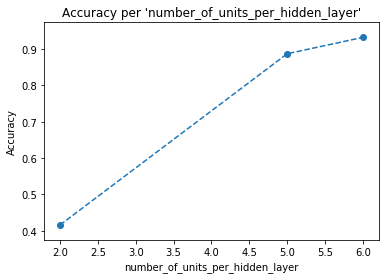

   number_of_units_per_hidden_layer  Accuracy
0                                 2  0.415926
1                                 5  0.887218
2                                 6  0.932331


In [44]:
nnpt.plot_result()

In [ ]:
# TODO: Plot Matrix